## Two Node Network

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:
Brief Description. Small “musty” datasets like that from this 1941 study have proven very valuable in testing and 
comparing new network algorithms.

Dataset: http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat

Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html
What can you infer about the relationships between (1) the women, and (2) the social events?  
Please provide your code and analysis in an Jupyter notebook stored in your GitHub repository.
You may work in a small group on this project.

##### DESCRIPTION 

One 18×14 matrix, binary.

##### BACKGROUND

These data were collected by Davis et al in the 1930s. 
They represent observed attendance at 14 social events by 18 Southern women. 
The result is a person-by-event matrix: cell (i,j) is 1 if person i attended social event j, and 0 otherwise.

##### Data Source:

http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis



###### REFERENCES

Breiger R. (1974). The duality of persons and groups. Social Forces, 53, 181-190.
Davis, A et al. (1941). Deep South. Chicago: University of Chicago Press.
List of datasets

In [1]:
import warnings
warnings.filterwarnings("ignore",category=UserWarning)
import pandas as pd
import numpy as np
import csv
import networkx as nx
import matplotlib.pyplot as plt
#from matplotlib import animation, cbook
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
import matplotlib.colors as pltc
from collections import Counter
from random import sample
import networkx.algorithms.bipartite as bipartite
#108 from matplotlib.cbook import MatplotlibDeprecationWarning, sanitize_sequence
#109 from matplotlib.cbook import mplDeprecation  # deprecated

#surpress warning
#import warnings
#import matplotlib.cbook
#warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

#all_colors = [k for k,v in pltc.cnames.items()]

#!pip3 install PyGMLParser
#!pip3 install GML

In [5]:
#url=''
#df =pd.read_csv(url, encoding='latin') #pd.read_csv(women_in_social_event.csv)
#print(df.head(8))
df = pd.read_csv('C:\\Users\\owner\\Downloads\\women_in_social_event.csv',encoding='latin' )
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df)


,Names,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14
0,EVELYN,1,1,1,1,1,1,0,1,1,0,0,0,0,0
1,LAURA,1,1,1,0,1,1,1,1,0,0,0,0,0,0
2,THERESA,0,1,1,1,1,1,1,1,1,0,0,0,0,0
3,BRENDA,1,0,1,1,1,1,1,1,0,0,0,0,0,0
4,CHARLOTTE,0,0,1,1,1,0,1,0,0,0,0,0,0,0
5,FRANCES,0,0,1,0,1,1,0,1,0,0,0,0,0,0
6,ELEANOR,0,0,0,0,1,1,1,1,0,0,0,0,0,0
7,PEARL,0,0,0,0,0,1,0,1,1,0,0,0,0,0
8,RUTH,0,0,0,0,1,0,1,1,1,0,0,0,0,0
9,VERNE,0,0,0,0,0,0,1,1,1,0,0,1,0,0


In [6]:
events = list(df1)[1:]
print(events)

['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14']


In [7]:
members = list(df1['Names'])
print(members)

['EVELYN', 'LAURA', 'THERESA', 'BRENDA', 'CHARLOTTE', 'FRANCES', 'ELEANOR', 'PEARL', 'RUTH', 'VERNE', 'MYRNA', 'KATHERINE', 'SYLVIA', 'NORA', 'HELEN', 'DOROTHY', 'OLIVIA', 'FLORA']


In [8]:
dfx = df1.drop(df1.columns[[0]], axis=1)
#top50a
dfx

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14
0,1,1,1,1,1,1,0,1,1,0,0,0,0,0
1,1,1,1,0,1,1,1,1,0,0,0,0,0,0
2,0,1,1,1,1,1,1,1,1,0,0,0,0,0
3,1,0,1,1,1,1,1,1,0,0,0,0,0,0
4,0,0,1,1,1,0,1,0,0,0,0,0,0,0
5,0,0,1,0,1,1,0,1,0,0,0,0,0,0
6,0,0,0,0,1,1,1,1,0,0,0,0,0,0
7,0,0,0,0,0,1,0,1,1,0,0,0,0,0
8,0,0,0,0,1,0,1,1,1,0,0,0,0,0
9,0,0,0,0,0,0,1,1,1,0,0,1,0,0


In [10]:
adj_matrix = dfx.to_numpy()
print(adj_matrix)

[[1 1 1 1 1 1 0 1 1 0 0 0 0 0]
 [1 1 1 0 1 1 1 1 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [1 0 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 1 1 1 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 1 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 1 0 0 0 0 0]
 [0 0 0 0 1 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 1 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 0 1 1 1]
 [0 0 0 0 0 1 1 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 0 1 1 1 1 1]
 [0 0 0 0 0 0 0 1 1 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0]]


In [11]:
adj_matrix.shape

(18, 14)

In [12]:
# Network
def create_network(top, bottom, adjacent):
    G = nx.Graph()
    G.add_nodes_from(top,bipartite=0)
    G.add_nodes_from(bottom, bipartite=1)
    for i in range(len(bottom)):
        for j in range(len(top)):
            if adjacent[i,j]==1:
                G.add_edge(bottom[i], top[j])
                
    return G

G = create_network(events,members,adj_matrix)


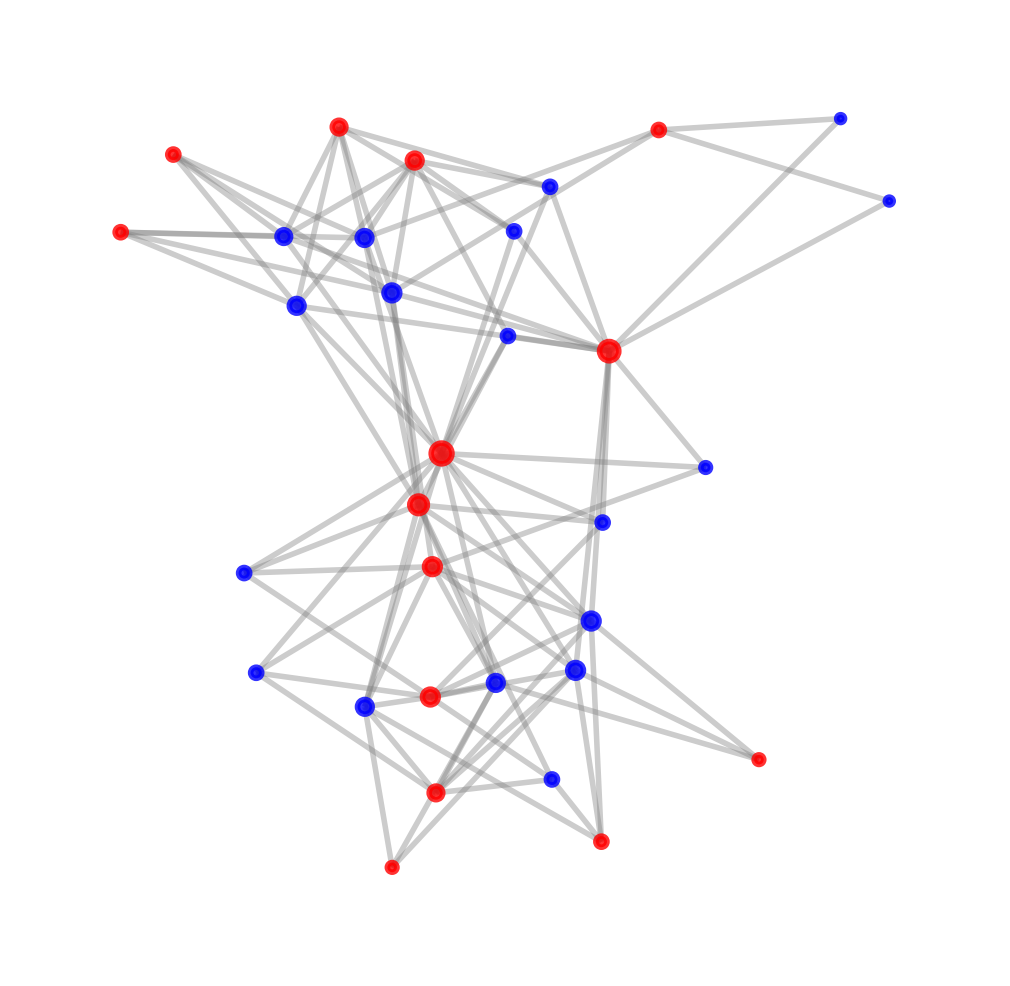

In [16]:
# Visualizing the network

fig = plt.figure(1, figsize=(3,3), dpi=400)
pos = nx.spring_layout(G)
colors = {0:'r', 1:'b'}
#nodes
nx.draw_networkx_nodes(G, pos=pos, node_size=[G.degree[node] for node in G], alpha = 0.8, \
                       node_color=[colors[G.nodes[node]['bipartite']]for node in G])
#edges
nx.draw_networkx_edges(G, pos=pos, alpha=0.4, edge_color='gray')
plt.axis('off')
plt.show()

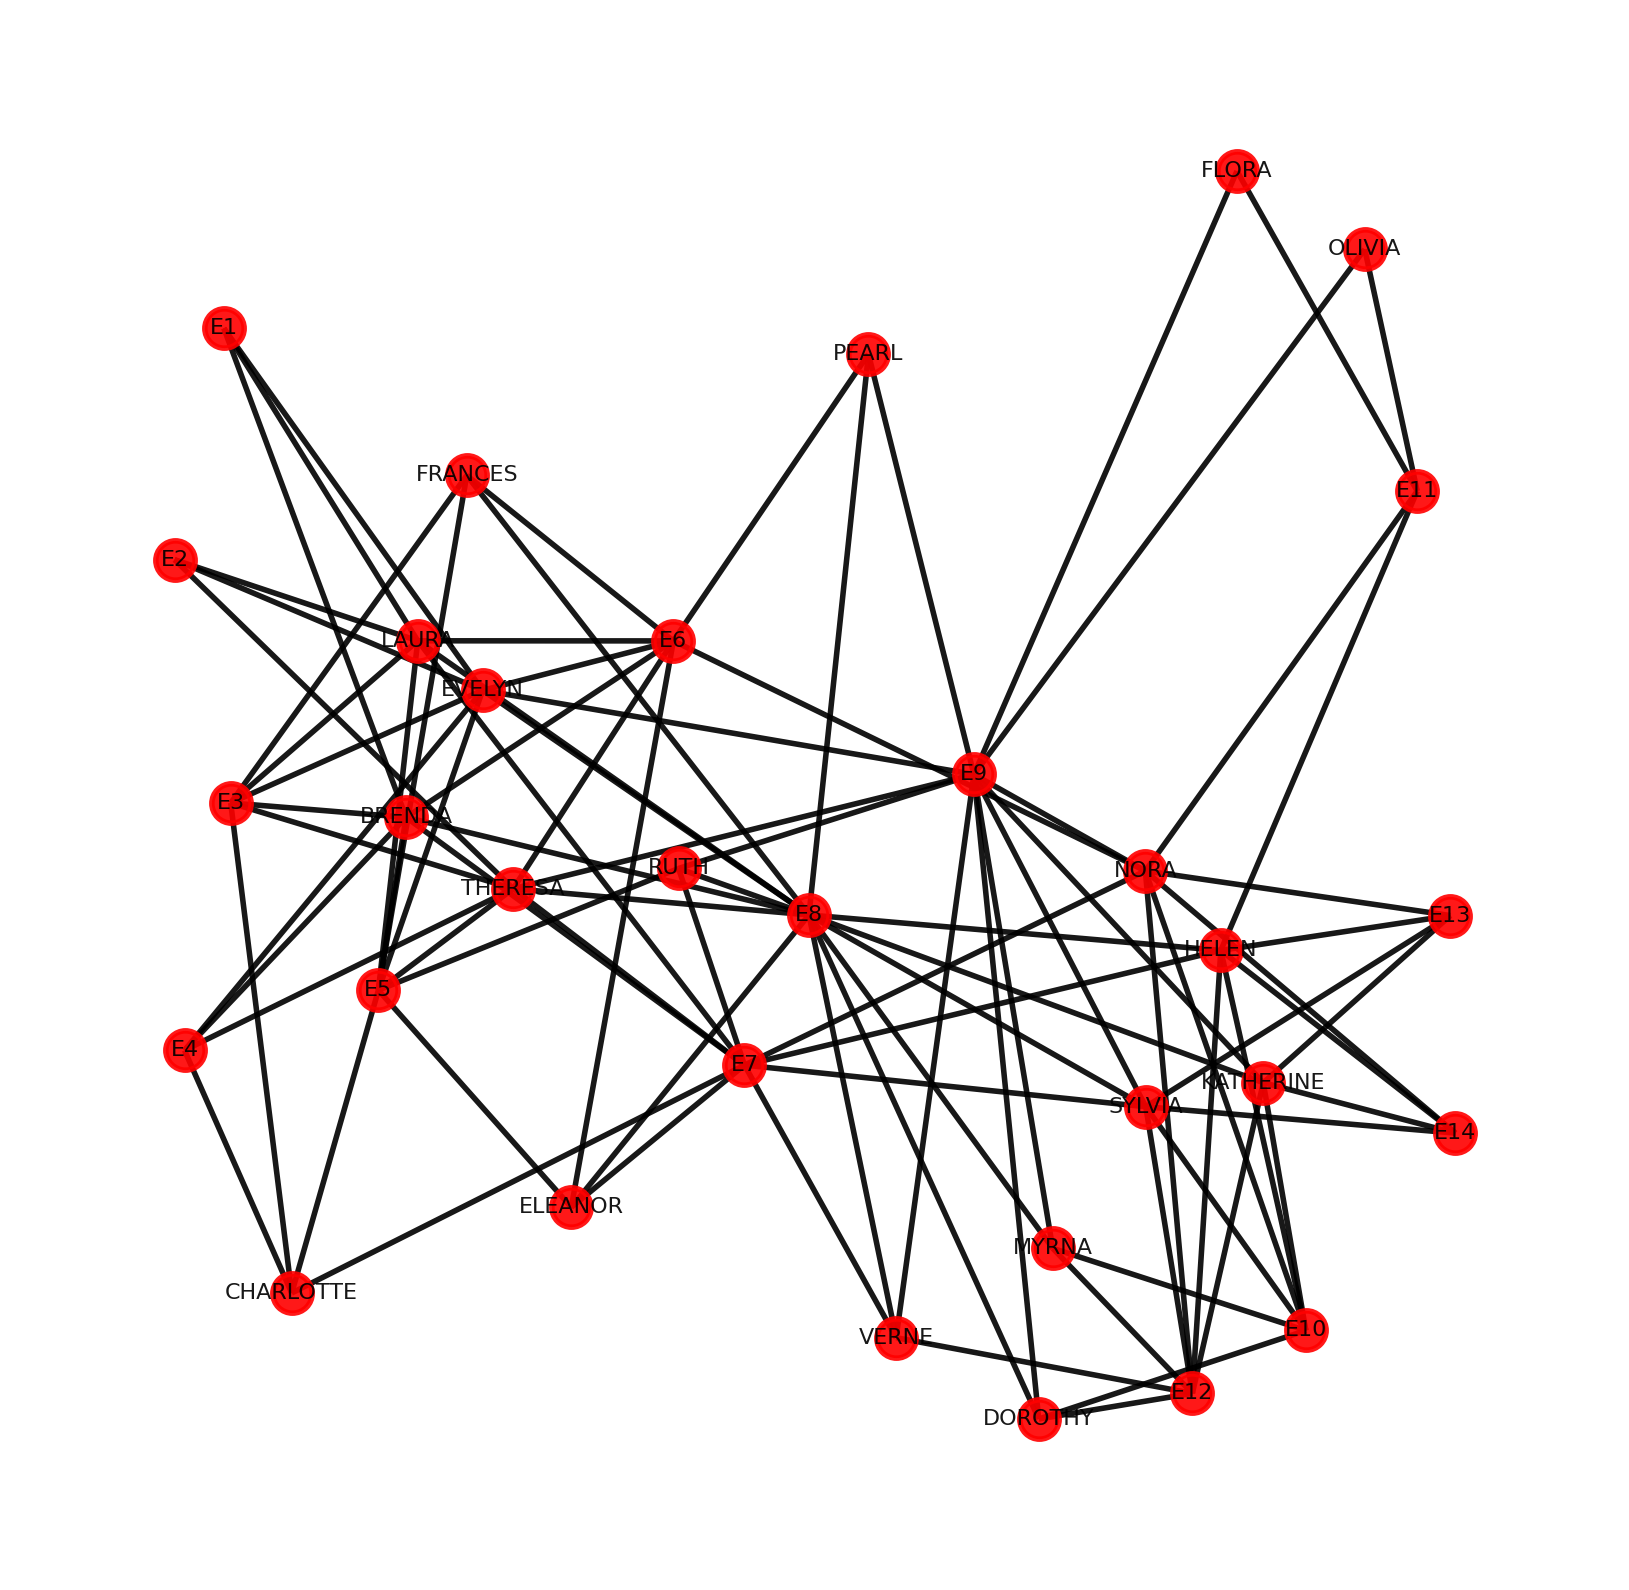

In [21]:

fig = plt.figure(1, figsize=(5,5), dpi=400)


#Network layout, position
pos = nx.spring_layout(G)

#node layout
nx.draw_networkx(G, pos = pos, with_labels=True, font_size=4, font_weight=2, node_size = 50 , node_color = 'r', alpha = 0.9, edge_color = 'black')

plt.axis('off')
plt.show()


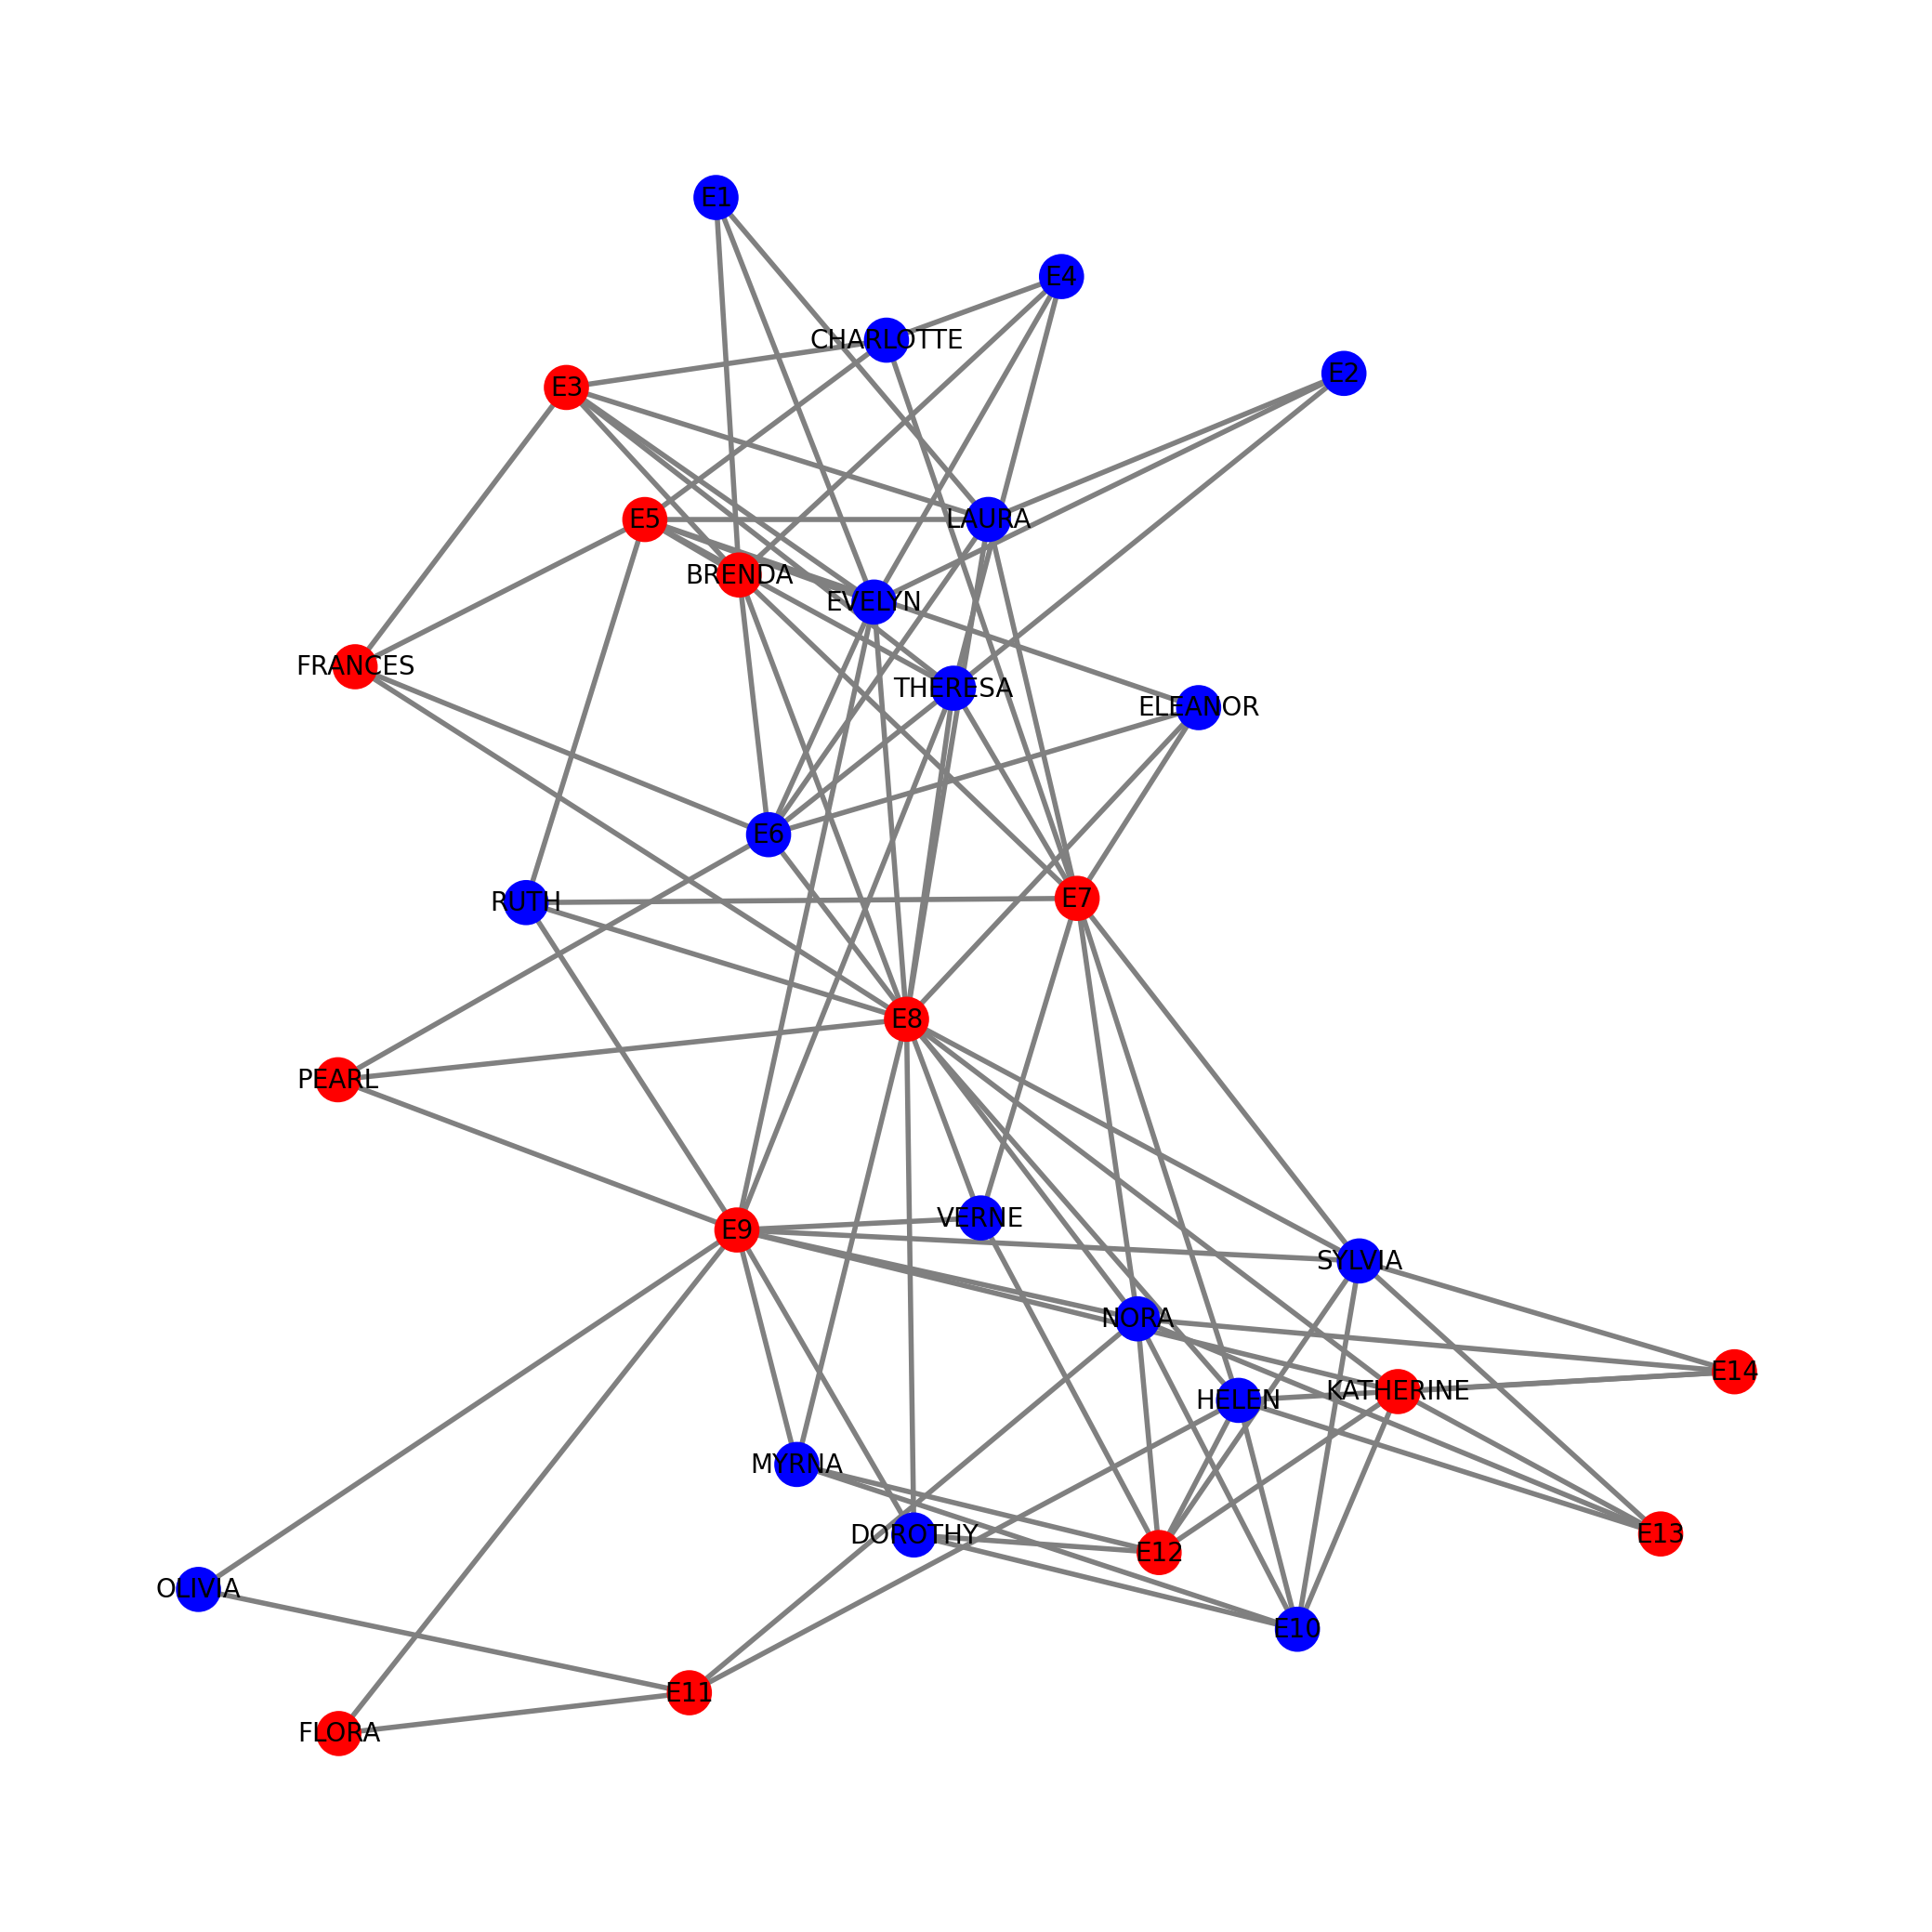

In [43]:

fig = plt.figure(1, figsize=(5,5), dpi=400)

#plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G, scale=32)
#pos=nx.circular_layout(G, scale=32)
#pos=nx.bipartite_layout(G, G.nodes)

color_state_map = {0: 'red', 1: 'blue'}

states = np.random.choice([0,1], size=32)
nx.set_node_attributes(G, dict(zip(G.nodes(), states)), 'state')
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True, font_size=5, edge_color = 'gray' ,node_color=[color_state_map[node[1]['state']] for node in G.nodes(data=True)],node_size=60, font_color='black')
plt.show()


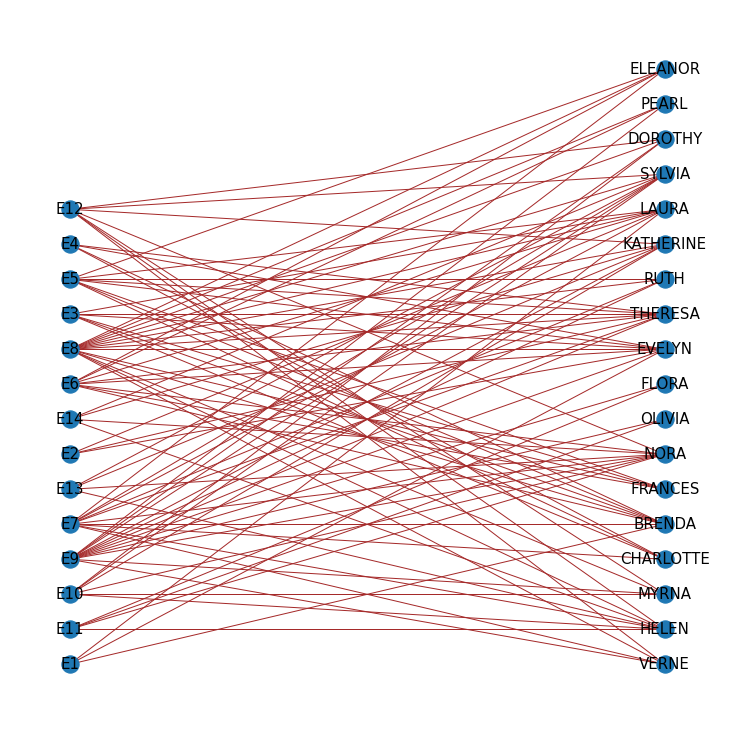

In [59]:
plt.figure(figsize=(10, 10))

X, Y = bipartite.sets(G)
pos = dict()
#color_state_map = {0: 'red', 1: 'blue'}
#states = np.random.choice([0,1], size=32)
#node_color=[color_state_map[node[1]['state']] for node in G.nodes(data=True)]

pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw(G, pos=pos, with_labels=True, font_size=15, edge_color = 'brown')
plt.show()

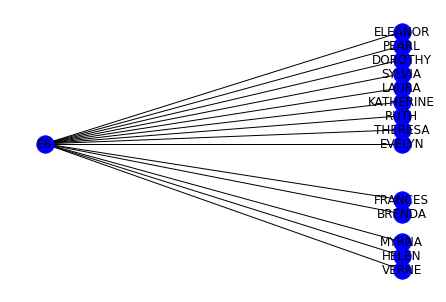

In [ ]:
##### T

In [36]:
eventss, social_members = bipartite.degrees(G, members)

def get_highest(degree_dict, degree_type):
    #order dict by value
    p = Counter(dict(degree_dict))
    print('Top5 '  +  degree_type)
    for u, v in p.most_common(5):
        print('%s: %i' % (u,v))
                
get_highest(eventss, ' Events')

Top5  Events
E8: 14
E9: 12
E7: 10
E6: 8
E5: 8


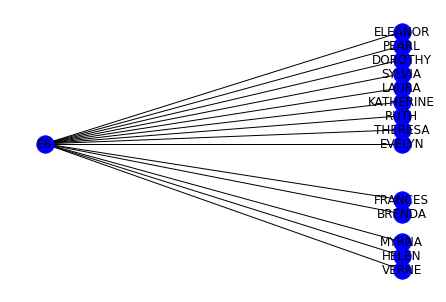

In [80]:
E8=nx.ego_graph(G, 'E8', radius=1)
nx.draw(E8, pos,with_labels=True, font_size=12, node_color ='blue')

In [37]:
get_highest(social_members, 'Members participating in events')

Top5 Members participating in many events
NORA: 8
EVELYN: 8
THERESA: 8
HELEN: 7
BRENDA: 7


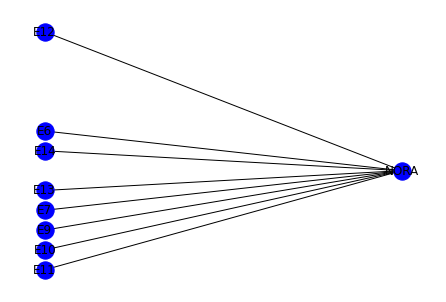

In [81]:
top1=nx.ego_graph(G, 'NORA', radius=1)
nx.draw(top1, pos,with_labels=True, font_size=12, node_color ='blue')

In [ ]:
There are 04 women to be considered most social because attending many events. These are Nora, Evelyn, Theresa, Helen and Brenda.
There are 04 events to be considered most popular because attracting a lot of members. These are E8, E9, E7, E6 and E5.